In [1]:
import pandas as pd
resenha = pd.read_csv("imdb-reviews-pt-br.csv")
resenha.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [2]:
from sklearn.model_selection import train_test_split
treino, teste , classe_treino, classe_teste = train_test_split(resenha.text_pt, 
                                                               resenha.sentiment,
                                                               random_state=42)

In [3]:
classe_teste

12532    pos
35445    neg
20279    pos
2969     neg
45161    pos
        ... 
16421    pos
39861    pos
309      neg
20638    pos
38935    pos
Name: sentiment, Length: 12365, dtype: object

In [7]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(treino,classe_treino)
r2= lr.score(teste,classe_teste)
print(r2)

ValueError: could not convert string to float: 'Embora o filme tenha sido apenas assim, o closed caption foi de longe o melhor que eu já vi! Na maioria das vezes, a ortografia é terrível e a legenda está fora de sincronia. Eu uso o closed captioning mesmo que eu possa ouvir bem, mas acho que muitos atores resmungam. Também muitas vezes a trilha sonora substitui o diálogo. Obrigado!'

In [8]:
print("Negativa \n")
print(resenha.text_pt[189])

Negativa 

Este é sem dúvida o pior filme que eu já vi. E acredite em mim, eu vi muitos filmes. A reviravolta inacreditável que o filme faz - passando de um extremamente mau filme "Formas de vida alienígenas habitam a terra", com um filme que tenta espalhar um arquicristiano "O dia do julgamento está próximo, buscar Jesus ou queimar por toda a eternidade em as dívidas ardentes do inferno "mensagem - deixou-me atordoado depois de ter sido atormentado por 85 minutos. Até mesmo os cristãos religiosos devem se envergonhar ou ficar furiosos ao ver suas crenças postadas dessa maneira. Eu não sabia o que fazer comigo quando assisti a atuação horrível que poderia ter sido realizada por crianças de 7 anos de idade. Simplesmente repugnante. Eu não sou cristão nem muito religioso. Mas se eu estivesse, não teria mais medo do Inferno. Rich Christiano mostrou ser algo muito pior.


In [9]:
print("Positiva \n")
print(resenha.text_pt[49002])

Positiva 

Crescendo em Nova York no final dos anos 80 e início dos anos 90, posso dizer pessoalmente que este é um dos documentários mais importantes feitos para cobrir esse lugar neste período de tempo. Não Madonna não veio com a idéia de Voguing, mas é de onde ela tirou! Em vez de combater a violência uns dos outros ou em brigas de gato, o voguing permitia que as pessoas "lutassem" dentro dos confins de tudo, menos que tocassem umas às outras, o que justificaria uma desqualificação automática. Vendo este tipo de extraordinariamente talentosas / bem orquestradas "jogadas" nos clubes foi nada menos do que espetacular e todos os grandes nomes de antigamente estão aqui ... Pepper La Beija, Paris Duprée, Xtragavaganza, etc. ..tudo comemorado nos gostos de peças de época como a música de Malcom McLarens "Deep in Vogue" ... não importava quem você era, ou de onde você era porque quando você passava por aquelas portas nesse "reino mágico" de De certa forma, você se tornou parte de algo maio

In [10]:
print(resenha.sentiment.value_counts())

sentiment
neg    24765
pos    24694
Name: count, dtype: int64


In [14]:
classificacao  =resenha["sentiment"].replace(["neg", "pos"], [0,1])
classificacao
resenha['classificacao'] = classificacao

/tmp/ipykernel_305/1892658352.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  classificacao  =resenha["sentiment"].replace(["neg", "pos"], [0,1])


In [15]:
resenha.tail()

,id,text_en,text_pt,sentiment,classificacao
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1
49458,49460,Working-class romantic drama from director Mar...,O drama romântico da classe trabalhadora do di...,pos,1


<h3>Bag of Words</h3>

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
text = ['Assisti um filme ótimo', 'assisti um filme ruim']
vetorizar = CountVectorizer(lowercase=False)
bag_of_words = vetorizar.fit_transform(text)

In [26]:
bag_of_words

<2x6 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [27]:
vetorizar.get_feature_names_out()

array(['Assisti', 'assisti', 'filme', 'ruim', 'um', 'ótimo'], dtype=object)

In [28]:
pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vetorizar.get_feature_names_out())

,Assisti,assisti,filme,ruim,um,ótimo
0,1,0,1,0,1,1
1,0,1,1,1,1,0


<h3>Com Dados Reais</h3>

In [30]:
vetorizar = CountVectorizer(lowercase=False, max_features=50)
bag_of_words = vetorizar.fit_transform(resenha.text_pt)
print(bag_of_words.shape)

(49459, 50)


In [47]:
vetorizar = CountVectorizer(lowercase=False)
bag_of_words = vetorizar.fit_transform(resenha.text_pt)
print(bag_of_words.shape)

(49459, 156923)


In [31]:
vetorizar.get_feature_names_out()

array(['Eu', 'ao', 'apenas', 'as', 'com', 'como', 'da', 'de', 'do', 'dos',
       'ela', 'ele', 'eles', 'em', 'era', 'esse', 'este', 'está', 'eu',
       'filme', 'filmes', 'foi', 'história', 'isso', 'mais', 'mas', 'me',
       'muito', 'na', 'no', 'não', 'os', 'ou', 'para', 'por', 'quando',
       'que', 'realmente', 'se', 'ser', 'seu', 'sobre', 'sua', 'são',
       'também', 'tem', 'tão', 'um', 'uma', 'você'], dtype=object)

In [33]:
pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vetorizar.get_feature_names_out()).head(10)

,Eu,ao,apenas,as,com,como,da,de,do,dos,...,seu,sobre,sua,são,também,tem,tão,um,uma,você
0,0,1,0,0,2,1,0,4,4,2,...,1,1,0,0,0,1,0,3,2,0
1,0,0,0,0,2,0,0,7,1,2,...,1,0,0,2,0,1,0,4,2,1
2,1,0,0,0,3,1,0,10,2,0,...,0,0,0,3,1,0,1,3,2,2
3,2,0,1,4,7,2,1,13,3,1,...,0,0,0,1,0,1,0,7,4,1
4,0,0,1,2,3,0,1,16,2,1,...,0,0,0,4,0,0,0,3,4,0
5,0,1,0,0,1,1,0,3,0,1,...,0,0,1,0,0,1,0,2,0,0
6,1,0,1,0,1,1,0,10,0,1,...,2,0,0,1,1,2,0,5,0,0
7,1,0,0,0,1,2,0,6,3,0,...,0,0,1,0,0,0,1,3,2,4
8,0,0,1,0,1,1,0,10,0,0,...,1,0,0,0,0,0,0,4,2,1
9,0,0,0,0,3,2,3,15,1,1,...,0,0,0,1,0,1,0,4,3,0


In [37]:
treino, teste, classe_treino,classe_teste = train_test_split(bag_of_words,resenha['classificacao'], random_state=42)

In [39]:
lr = LogisticRegression()
lr.fit(treino,classe_treino)
print("r2: ", lr.score(teste,classe_teste))

r2:  0.6583097452486858


In [43]:
def classificar_texto(texto, coluna_texto, coluna_classificacao,max_features):
    vetorizar = CountVectorizer(lowercase=False, max_features=max_features)
    bag_of_words = vetorizar.fit_transform(texto[coluna_texto])
    treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words, texto[coluna_classificacao])
    lr = LogisticRegression()
    lr.fit(treino,classe_treino)
    return lr.score(teste, classe_teste)

In [41]:
print(classificar_texto(resenha, "text_pt", "classificacao",50))

0.6553174282248282


In [44]:
print(classificar_texto(resenha, "text_pt", "classificacao",10))

0.5903760614638092


In [45]:
print(classificar_texto(resenha, "text_pt", "classificacao",80))

0.6813586736756976


In [46]:
print(classificar_texto(resenha, "text_pt", "classificacao",200))

0.7503437120905783


In [48]:
print(classificar_texto(resenha, "text_pt", "classificacao",500))

0.819652244237768


/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [49]:
!pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 548.3/548.3 kB 2.4 MB/s eta 0:00:00:00:010:01


In [53]:
from wordcloud import WordCloud
todas_palavras = ' '.join([texto for texto in resenha.text_pt])
len(todas_palavras)


63448424

In [54]:
nuvem_palavras = WordCloud().generate(todas_palavras)

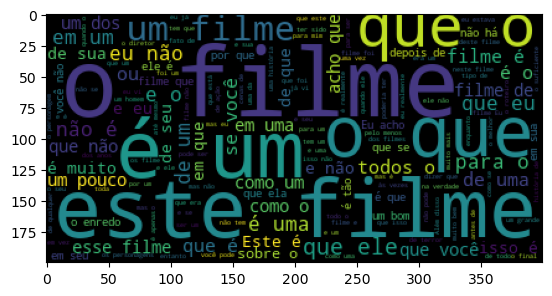

In [55]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(nuvem_palavras)
plt.show()

In [57]:
todas_palavras = ' '.join([texto for texto in resenha.text_pt])
nuvem_palavras = WordCloud(width=800, height= 500, max_font_size=110).generate(todas_palavras)

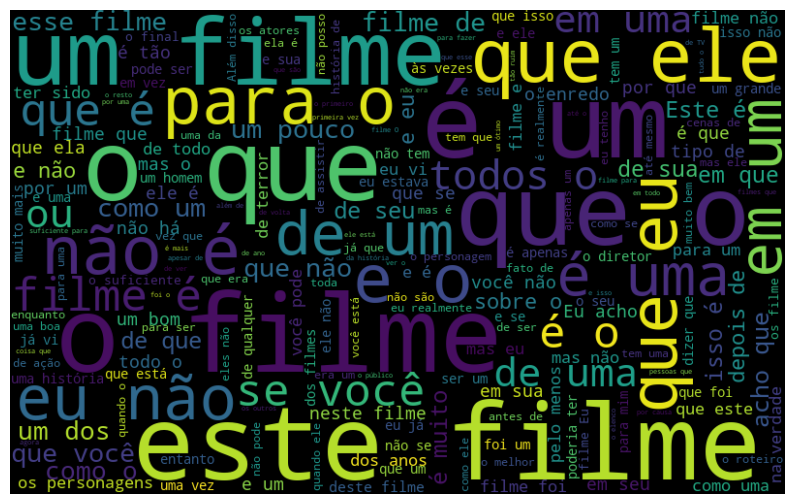

In [60]:
plt.figure(figsize=(10,7))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis("off")
plt.show()

In [64]:
texto_negativo = resenha[resenha.sentiment == 'neg']
texto_negativo.head()

,id,text_en,text_pt,sentiment,classificacao
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0


In [83]:
def nuvem_negativa(texto, coluna_texto):
    texto_negativo = texto[texto.sentiment == 'neg']
    todas_palavras = ' '.join([texto for texto in texto_negativo[coluna_texto]])
    nuvem = WordCloud(width=800, height= 500, max_font_size=110, collocations=False).generate(todas_palavras)
    plt.figure(figsize=(10,7))
    plt.imshow(nuvem, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [86]:
def gera_nuvem(texto, coluna_texto, sentimento):
    texto_negativo = texto[texto.sentiment == sentimento]
    todas_palavras = ' '.join([texto for texto in texto_negativo[coluna_texto]])
    nuvem = WordCloud(width=800, height= 110, max_font_size=110, collocations = False).generate(todas_palavras)
    plt.figure(figsize=(10,7))
    plt.imshow(nuvem, interpolation='bilinear')
    plt.axis("off")
    plt.show()

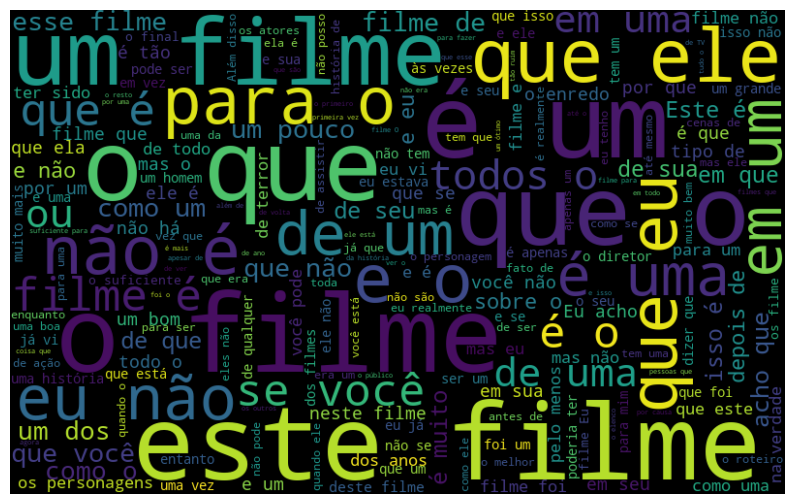

In [69]:
nuvem_negativa(resenha, "text_pt")

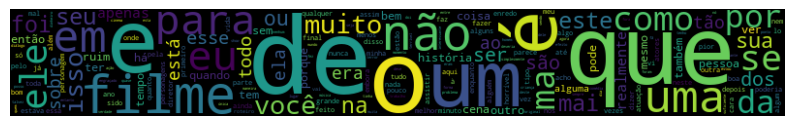

In [87]:
gera_nuvem(resenha, "text_pt", "neg")

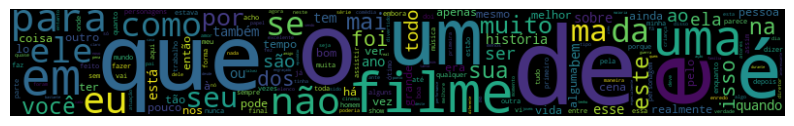

In [88]:
gera_nuvem(resenha, "text_pt", "pos")